<a href="https://colab.research.google.com/github/ronaksithape/OIBSIP/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Task 5**

#Sales Prediction

Sales prediction means predicting how much of a product people will buy based on factors
 such as the amount you spend to advertise your product, the segment of people you
 advertise for, or the platform you are advertising on about your product.
 Typically, a product and service-based business always need their Data Scientist to predict
 their future sales with every step they take to manipulate the cost of advertising their
 product. So let’s start the task of sales prediction with machine learning using Python.

##Import modules

In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

##Loading Dataset

In [55]:
df=pd.read_csv("/content/Advertising.csv")

In [56]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


##Data Exploration

In [57]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [58]:
df.sample


<bound method NDFrame.sample of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [59]:
df.shape

(200, 5)

In [60]:
df.isnull

<bound method DataFrame.isnull of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

##Checking for Null Values

In [61]:
df.isnull().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [62]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [63]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [64]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [65]:
df.shape

(200, 4)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [67]:
df.size

800

In [68]:
df.dtypes

,0
TV,float64
Radio,float64
Newspaper,float64
Sales,float64


In [69]:
df.duplicated().sum()

0

##Data Analysis

<Axes: >

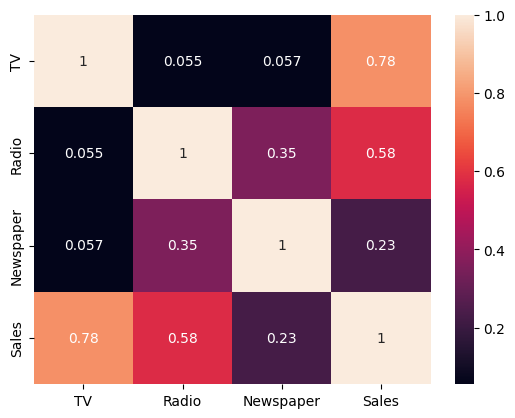

In [70]:
sns.heatmap(df.corr(),annot=True)

<ipython-input-95-899be5e44cdb>:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df.values, vert=False, patch_artist=True, labels=df.columns, showmeans=True, meanline=True)


Text(0.5, 1.0, 'Box Plot of DataFrame')

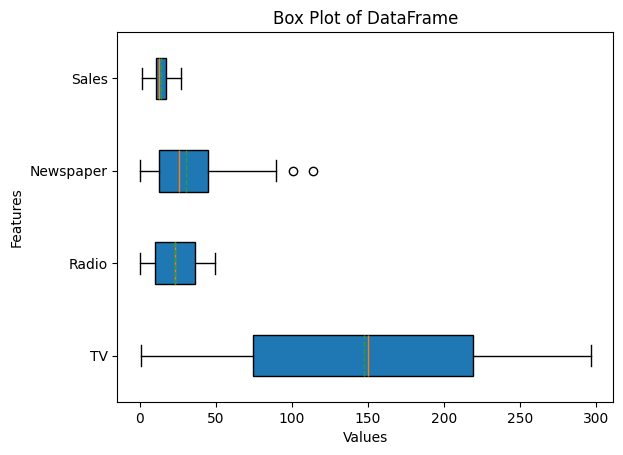

In [95]:
plt.boxplot(df.values, vert=False, patch_artist=True, labels=df.columns, showmeans=True, meanline=True)

plt.xlabel("Values")
plt.ylabel("Features")
plt.title("Box Plot of DataFrame")

Text(0.5, 1.0, 'Distribution of TV Advertisement Budget')

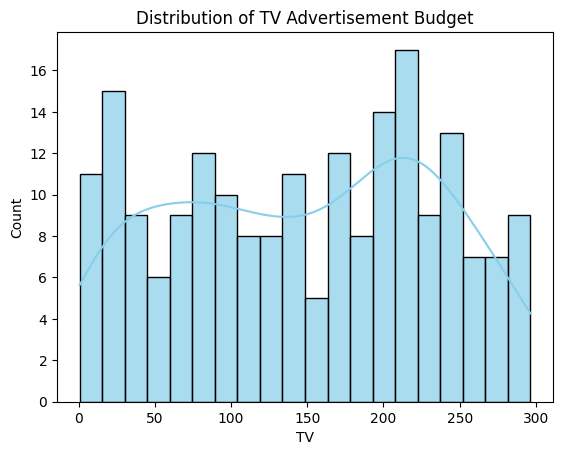

In [97]:
sns.histplot(df['TV'], bins=20, color='skyblue', edgecolor='black', alpha=0.7, kde=True)
plt.xlabel('TV')
plt.ylabel('Count')
plt.title('Distribution of TV Advertisement Budget')

<Axes: xlabel='Newspaper', ylabel='Count'>

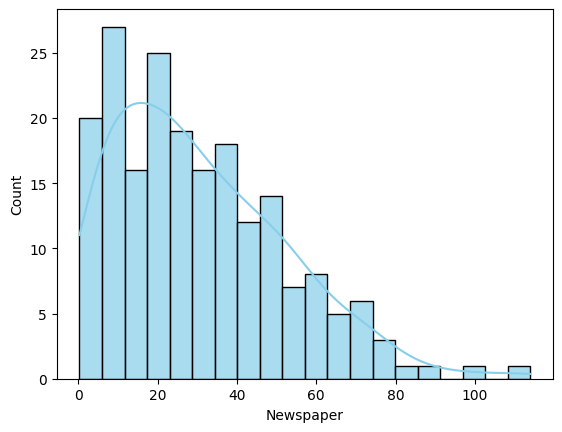

In [98]:
sns.histplot(df['Newspaper'], bins=20, color='skyblue', edgecolor='black', alpha=0.7, kde=True)

<Axes: xlabel='Radio', ylabel='Count'>

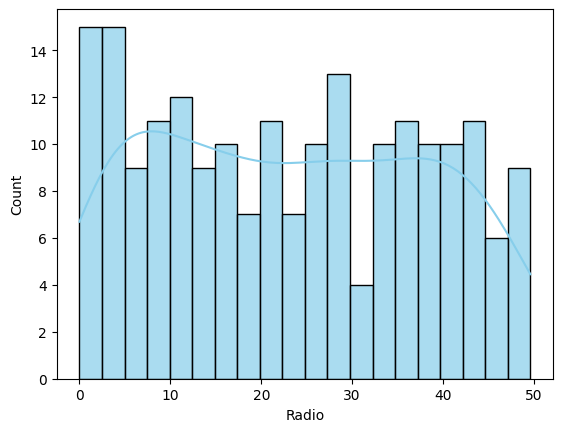

In [99]:
sns.histplot(df['Radio'], bins=20, color='skyblue', edgecolor='black', alpha=0.7, kde=True)

<Axes: xlabel='Sales', ylabel='Count'>

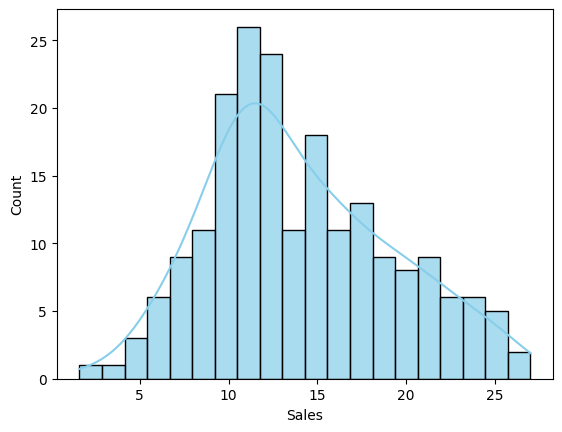

In [100]:
sns.histplot(df['Sales'], bins=20, color='skyblue', edgecolor='black', alpha=0.7, kde=True)

##Model Training

In [77]:
x=df.iloc[:,:-1]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [78]:
y = df.iloc[:,-1:]

In [79]:
xtrain,xtest,ytrain,ytest  = train_test_split(x,y,test_size=0.3,random_state=32)

In [80]:
print(x.shape)
print(xtrain.shape)
print(xtest.shape)

(200, 3)
(140, 3)
(60, 3)


In [83]:
model = LinearRegression()

In [84]:
model.fit(xtrain,ytrain)

LinearRegression()

In [85]:
ypredict=model.predict(xtest)
ypredict

array([[13.72572578],
       [ 9.72240864],
       [13.45519441],
       [23.09056837],
       [ 9.16448861],
       [11.7657469 ],
       [10.11868231],
       [19.60101978],
       [ 7.83201008],
       [ 6.57738068],
       [17.18840537],
       [13.98205349],
       [20.6429174 ],
       [16.66542454],
       [12.32808985],
       [12.10093965],
       [ 7.14126867],
       [23.31625485],
       [19.97140562],
       [15.50493767],
       [15.22953122],
       [ 8.89130909],
       [14.81518986],
       [14.30934175],
       [ 8.93883854],
       [ 8.76999895],
       [ 8.59812376],
       [18.87010689],
       [ 9.74934567],
       [ 9.92710827],
       [11.2675752 ],
       [10.1087144 ],
       [17.76024796],
       [15.54615036],
       [12.78625645],
       [18.35736608],
       [12.97658451],
       [13.86114212],
       [10.72107765],
       [ 7.69389229],
       [15.49834296],
       [15.72169067],
       [18.3930769 ],
       [12.96059256],
       [21.0955828 ],
       [16

In [102]:
print("Model Score x_train,y_train:",model.score(xtrain,ytrain)*100)

Model Score x_train,y_train: 91.67973760540579


In [103]:
print("Model Score x_test,y_test:",model.score(xtest,ytest)*100)

Model Score x_test,y_test: 83.20470849488278


In [105]:
print("Mean Squared Error:",mean_squared_error(ytest,ypredict))

Mean Squared Error: 3.7495203698290345


In [106]:
print("Mean absolute error:",mean_absolute_error(ytest,ypredict))

Mean absolute error: 1.3654567890610605


In [90]:
r2_score(ytest,ypredict)*100

83.20470849488278

In [91]:
r = np.sqrt(mean_squared_error(ytest,ypredict))
r

1.9363678291659967

In [92]:
cv = KFold(n_splits=5,shuffle=True, random_state=0)
cv

KFold(n_splits=5, random_state=0, shuffle=True)

In [93]:
score=cross_val_score(model,x,y,cv=cv,n_jobs=-1)
finalscore=np.mean(score)
finalscore

0.8910650514774895